In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Load the datasets

In [3]:
df_dona = pd.read_csv('ds//customer_profile_kmeans.csv', sep='\t')
df_dona

,CustomerID,I,Iu,Imax,E,Savg,R,F,M,cluster
0,12347.0,3.330211,1.939519,2.829947,4.239118,2.777935,40,2.178977,3.556087,high
1,12348.0,3.035029,0.954243,2.778151,2.550341,2.417438,76,1.041393,2.894560,medium
2,12349.0,2.799341,1.857332,2.799341,3.903268,3.163623,19,1.857332,3.163623,high
3,12350.0,2.292256,1.204120,2.292256,2.500000,2.468938,311,1.204120,2.468938,medium
4,12352.0,2.665581,1.755875,2.096910,3.158366,2.324080,73,1.845098,3.102231,medium
...,...,...,...,...,...,...,...,...,...,...
4201,18280.0,1.653213,1.000000,1.653213,1.846439,2.256718,160,1.000000,2.256718,low
4202,18281.0,1.732394,0.845098,1.732394,1.842371,1.907519,4,0.845098,1.907519,low
4203,18282.0,1.991226,1.079181,1.845098,3.022055,1.945961,216,1.079181,2.246991,low
4204,18283.0,3.131939,2.418301,2.382017,2.627193,2.105421,10,2.856729,3.309541,high


In [4]:
def mapping(x):
    if x == 'high':
        return 2
    if x == 'medium':
        return 1
    if x == 'low':
        return 0

In [5]:
df_dona['cluster'] = df_dona['cluster'].apply(mapping)
df_dona

,CustomerID,I,Iu,Imax,E,Savg,R,F,M,cluster
0,12347.0,3.330211,1.939519,2.829947,4.239118,2.777935,40,2.178977,3.556087,2
1,12348.0,3.035029,0.954243,2.778151,2.550341,2.417438,76,1.041393,2.894560,1
2,12349.0,2.799341,1.857332,2.799341,3.903268,3.163623,19,1.857332,3.163623,2
3,12350.0,2.292256,1.204120,2.292256,2.500000,2.468938,311,1.204120,2.468938,1
4,12352.0,2.665581,1.755875,2.096910,3.158366,2.324080,73,1.845098,3.102231,1
...,...,...,...,...,...,...,...,...,...,...
4201,18280.0,1.653213,1.000000,1.653213,1.846439,2.256718,160,1.000000,2.256718,0
4202,18281.0,1.732394,0.845098,1.732394,1.842371,1.907519,4,0.845098,1.907519,0
4203,18282.0,1.991226,1.079181,1.845098,3.022055,1.945961,216,1.079181,2.246991,0
4204,18283.0,3.131939,2.418301,2.382017,2.627193,2.105421,10,2.856729,3.309541,2


In [6]:
df_mio = pd.read_csv('ds//customers2.csv', sep=',')
del df_mio['Unnamed: 0']
df_mio

,CustomerID,E,YearFreq,logQta,logSpent,logAvgPrice,logAvgBasksValue,KMeans_label
0,13313.0,4.066998,0.416667,2.929930,3.191820,0.261890,2.492850,2
1,13248.0,3.902175,0.166667,2.484300,2.668088,0.183788,2.367058,2
2,13917.0,3.572431,0.166667,2.357935,2.434633,0.076698,2.133603,2
3,13062.0,3.121928,0.083333,2.534026,2.521112,-0.012914,2.521112,2
4,15192.0,4.461320,0.166667,2.858537,2.862918,0.004381,2.561888,2
...,...,...,...,...,...,...,...,...
4194,17079.0,0.000000,0.083333,1.380211,2.074816,0.694605,2.074816,0
4195,14393.0,2.321928,0.083333,1.113943,1.832189,0.718246,1.832189,0
4196,17578.0,2.584963,0.083333,1.954243,2.096006,0.141763,2.096006,0
4197,17603.0,2.522055,0.083333,1.863323,2.592143,0.728821,2.592143,0


# Useful functions
* ***preprocess_data***
    * **Input**: dataframe
    * **Output**: matrix
    Given a DataFrame, extract the matrix without the first and last column ('CustomerID' and labels), standardize is and extract two principal components
* ***plot_sihouette_score***
    * **Input**: matrix, labels
    Compute and plot silhouette scores, the input matrix is the post-processed DataFrame. Label is the vector of cluster's labels
* ***plot_similarity_heatmap***
    * **Input**: dataframe, string
    Compute and plot similarity heatmap. The input is the original dataframe and the string is column's name of the labels
* ***plot_label_distribution***
    * **Input**: dataframe, string
    Compute the distribution of the clusters. The input is the original dataframe and the string is column's name of the labels
* ***plot_basic_statistics***
    * **Input**: dataframe, string
    Compute and plot some statistics of the clusters. The input is the original dataframe and the string is column's name of the labels

In [7]:
def preprocess_data(df):
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    columns = df.columns[1:-1] # Extract all the columns but the first and the last
    X_data = df.loc[:, columns].to_numpy() # Convert to a np array
    sc = StandardScaler()
    X = sc.fit_transform(X_data) # Standardize the data
    # PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X = pca.fit_transform(X) # Extract the two principal components
    return X

In [8]:
def plot_similarity_heatmap(df, clust):
    from sklearn.metrics.pairwise import euclidean_distances
    columns = df.columns[1:-1]
    df.sort_values(by=clust, ascending=False, inplace=True)
    dist = euclidean_distances(df.loc[:, columns], df.loc[:, columns])
    sim = np.exp(-dist)
    sns_plot = sns.heatmap(sim)
    figure = sns_plot.get_figure()

In [9]:
def plot_silhouette_score(X, labels):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(labels) # Get cluster labels
    n_clusters = cluster_labels.shape[0] # Get number of clusters
    
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean') # Get the silhouette values

    y_ax_lower, y_ax_upper = 0, 0
    y_tick = []

    for i, c in enumerate(cluster_labels):
    
        c_silhouette_vals = silhouette_vals[labels==c]
        c_silhouette_vals.sort()
    
        print('Cluster', c, 'avg silhouette:', np.mean(c_silhouette_vals))
    
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        y_tick.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    print('Total avg silhouette:', silhouette_avg)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks=(y_tick, cluster_labels+1)
    plt.ylabel('Points')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [10]:
def label_distribution(df, clust):
    print('Number of clusters:', df[clust].nunique())
    print('Number of point per cluster:')
    for i, data in df[clust].groupby(df[clust]):
        perc = data.shape[0]/df.shape[0]
        print('\tCluster', i, 'points', data.shape[0], '(%.3f)' % perc)
    df[clust].groupby(df[clust]).count().plot(kind='bar')

In [11]:
def plot_basic_statistics(df, clust_column):
    columns = df.columns[1:-1]
    means = []
    std = []
    for i in np.unique(df[clust_column].array):
        clust = df.loc[df[clust_column] == i, columns]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)
    legend = []
    for i in np.unique(df[clust_column].array):
        plt.plot(range(0, columns.shape[0]), means[i], marker='o')
        legend.append('Cluster %d' %i)
    plt.legend(legend)
    plt.xticks(range(0, columns.shape[0]), columns)
    plt.show()

# Silhouette

Cluster 0 avg silhouette: 0.2473815316207735
Cluster 1 avg silhouette: 0.3776885336077915
Cluster 2 avg silhouette: 0.3675022207448927
Total avg silhouette: 0.3419395523696218


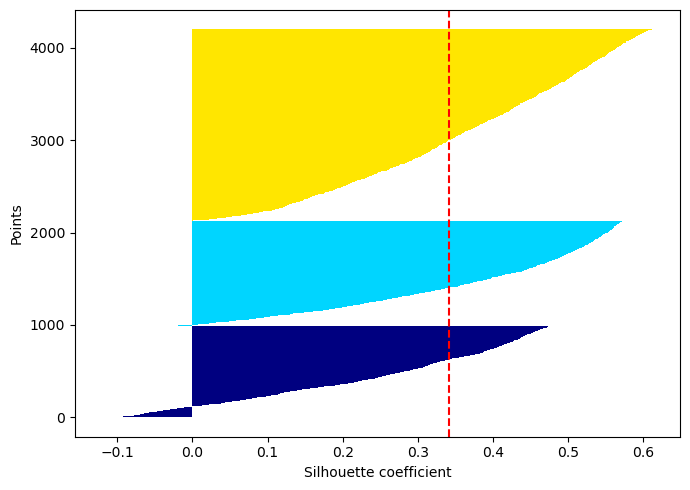

In [12]:
plot_silhouette_score(preprocess_data(df_mio), df_mio['KMeans_label'].array)

Cluster 0 avg silhouette: 0.35594456465033936
Cluster 1 avg silhouette: 0.3594991013848979
Cluster 2 avg silhouette: 0.41396149598102594
Total avg silhouette: 0.3776952405423048


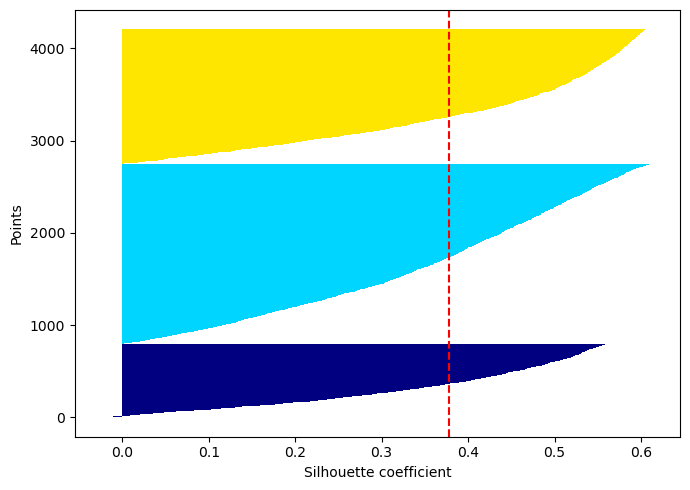

In [13]:
plot_silhouette_score(preprocess_data(df_dona), df_dona['cluster'].array)

# Similarity

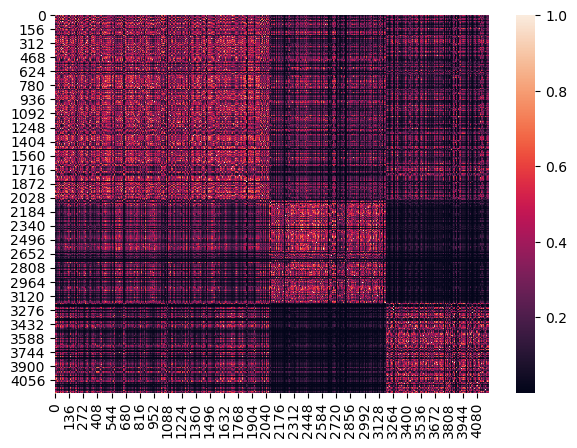

In [14]:
plot_similarity_heatmap(df_mio, 'KMeans_label')

### TEST: rimuovere la colonna R

In [15]:
del df_dona['R']

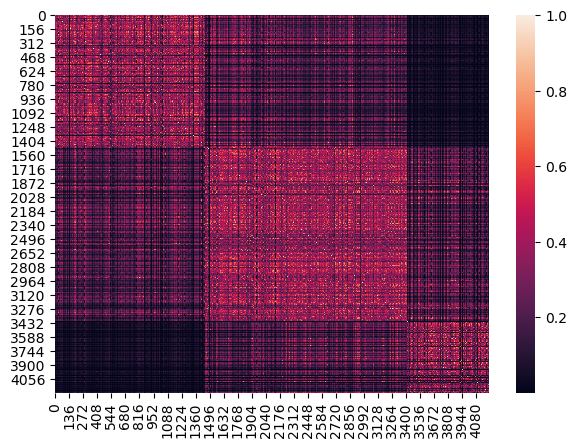

In [16]:
plot_similarity_heatmap(df_dona, 'cluster')

# Some statistics

Number of clusters: 3
Number of point per cluster:
	Cluster 0 points 793 (0.189)
	Cluster 1 points 1956 (0.465)
	Cluster 2 points 1457 (0.346)


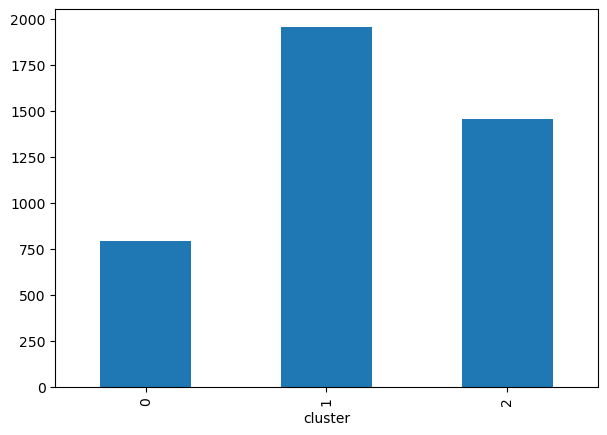

In [17]:
label_distribution(df_dona, 'cluster')

Number of clusters: 3
Number of point per cluster:
	Cluster 0 points 990 (0.236)
	Cluster 1 points 1137 (0.271)
	Cluster 2 points 2072 (0.493)


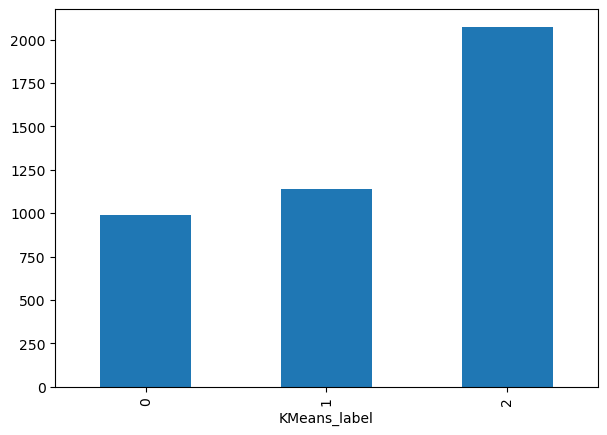

In [18]:
label_distribution(df_mio, 'KMeans_label')

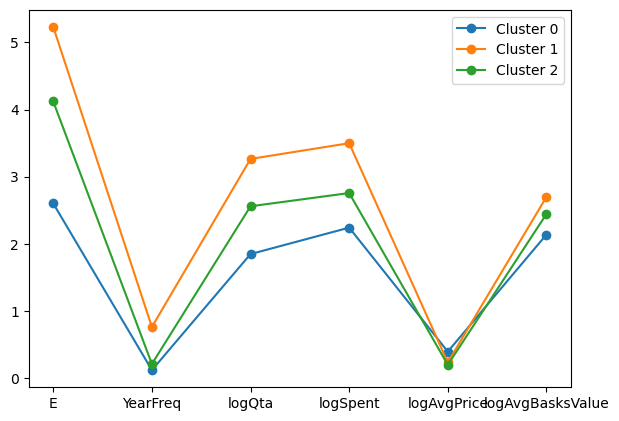

In [19]:
plot_basic_statistics(df_mio, 'KMeans_label')

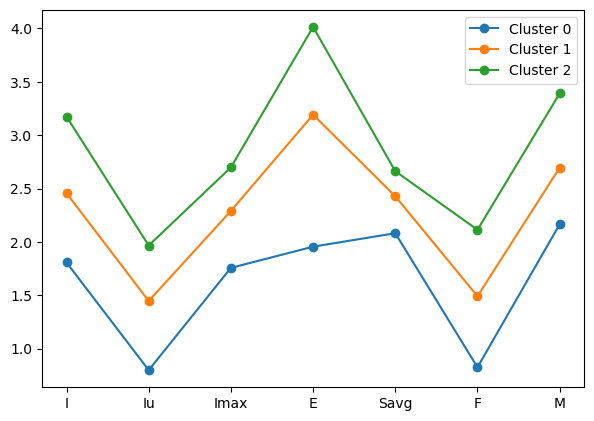

In [20]:
plot_basic_statistics(df_dona, 'cluster')

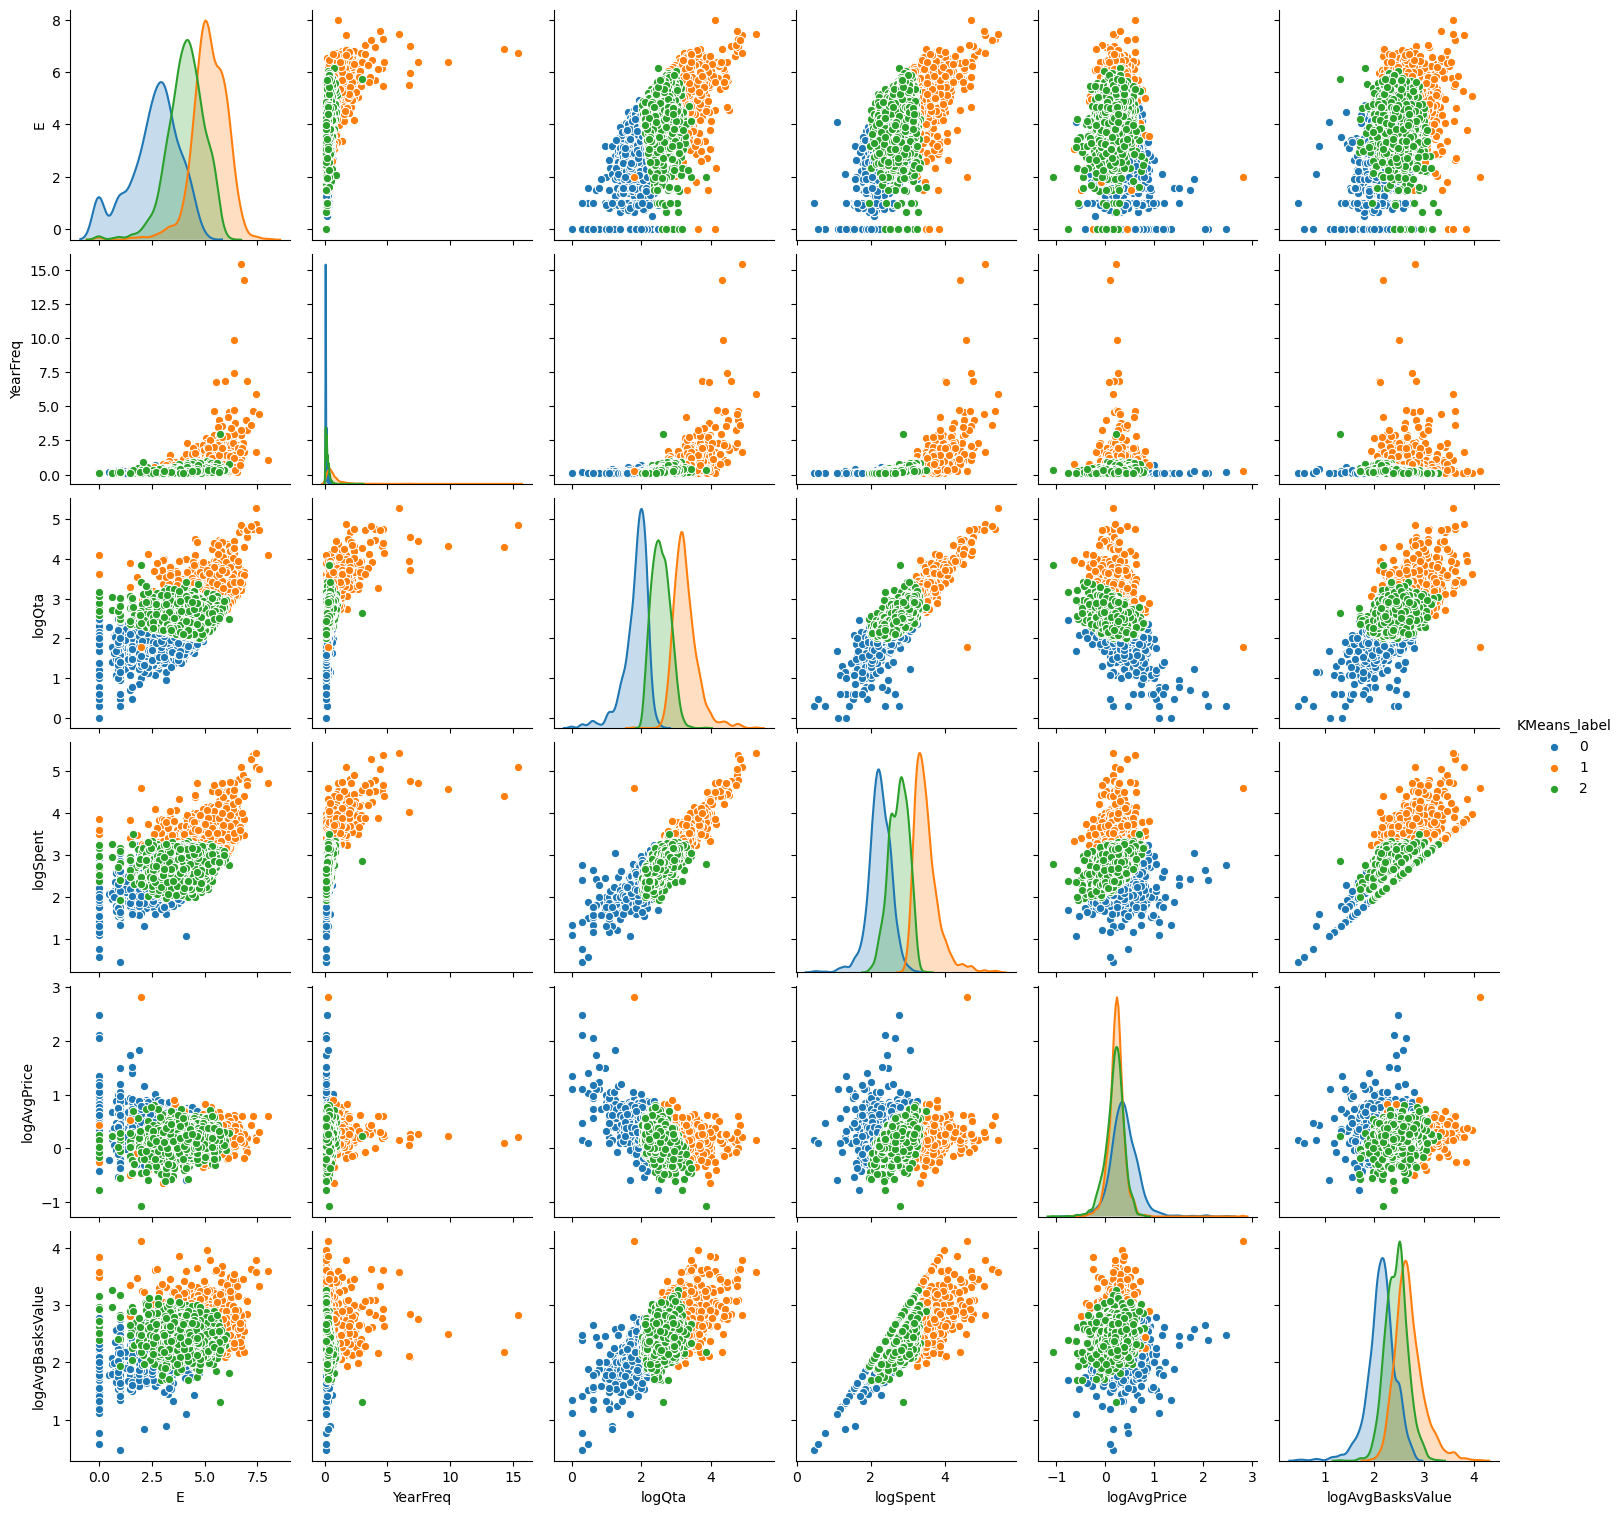

In [21]:
sns_plot = sns.pairplot(df_mio, hue='KMeans_label', vars=df_mio.columns[1:-1])  

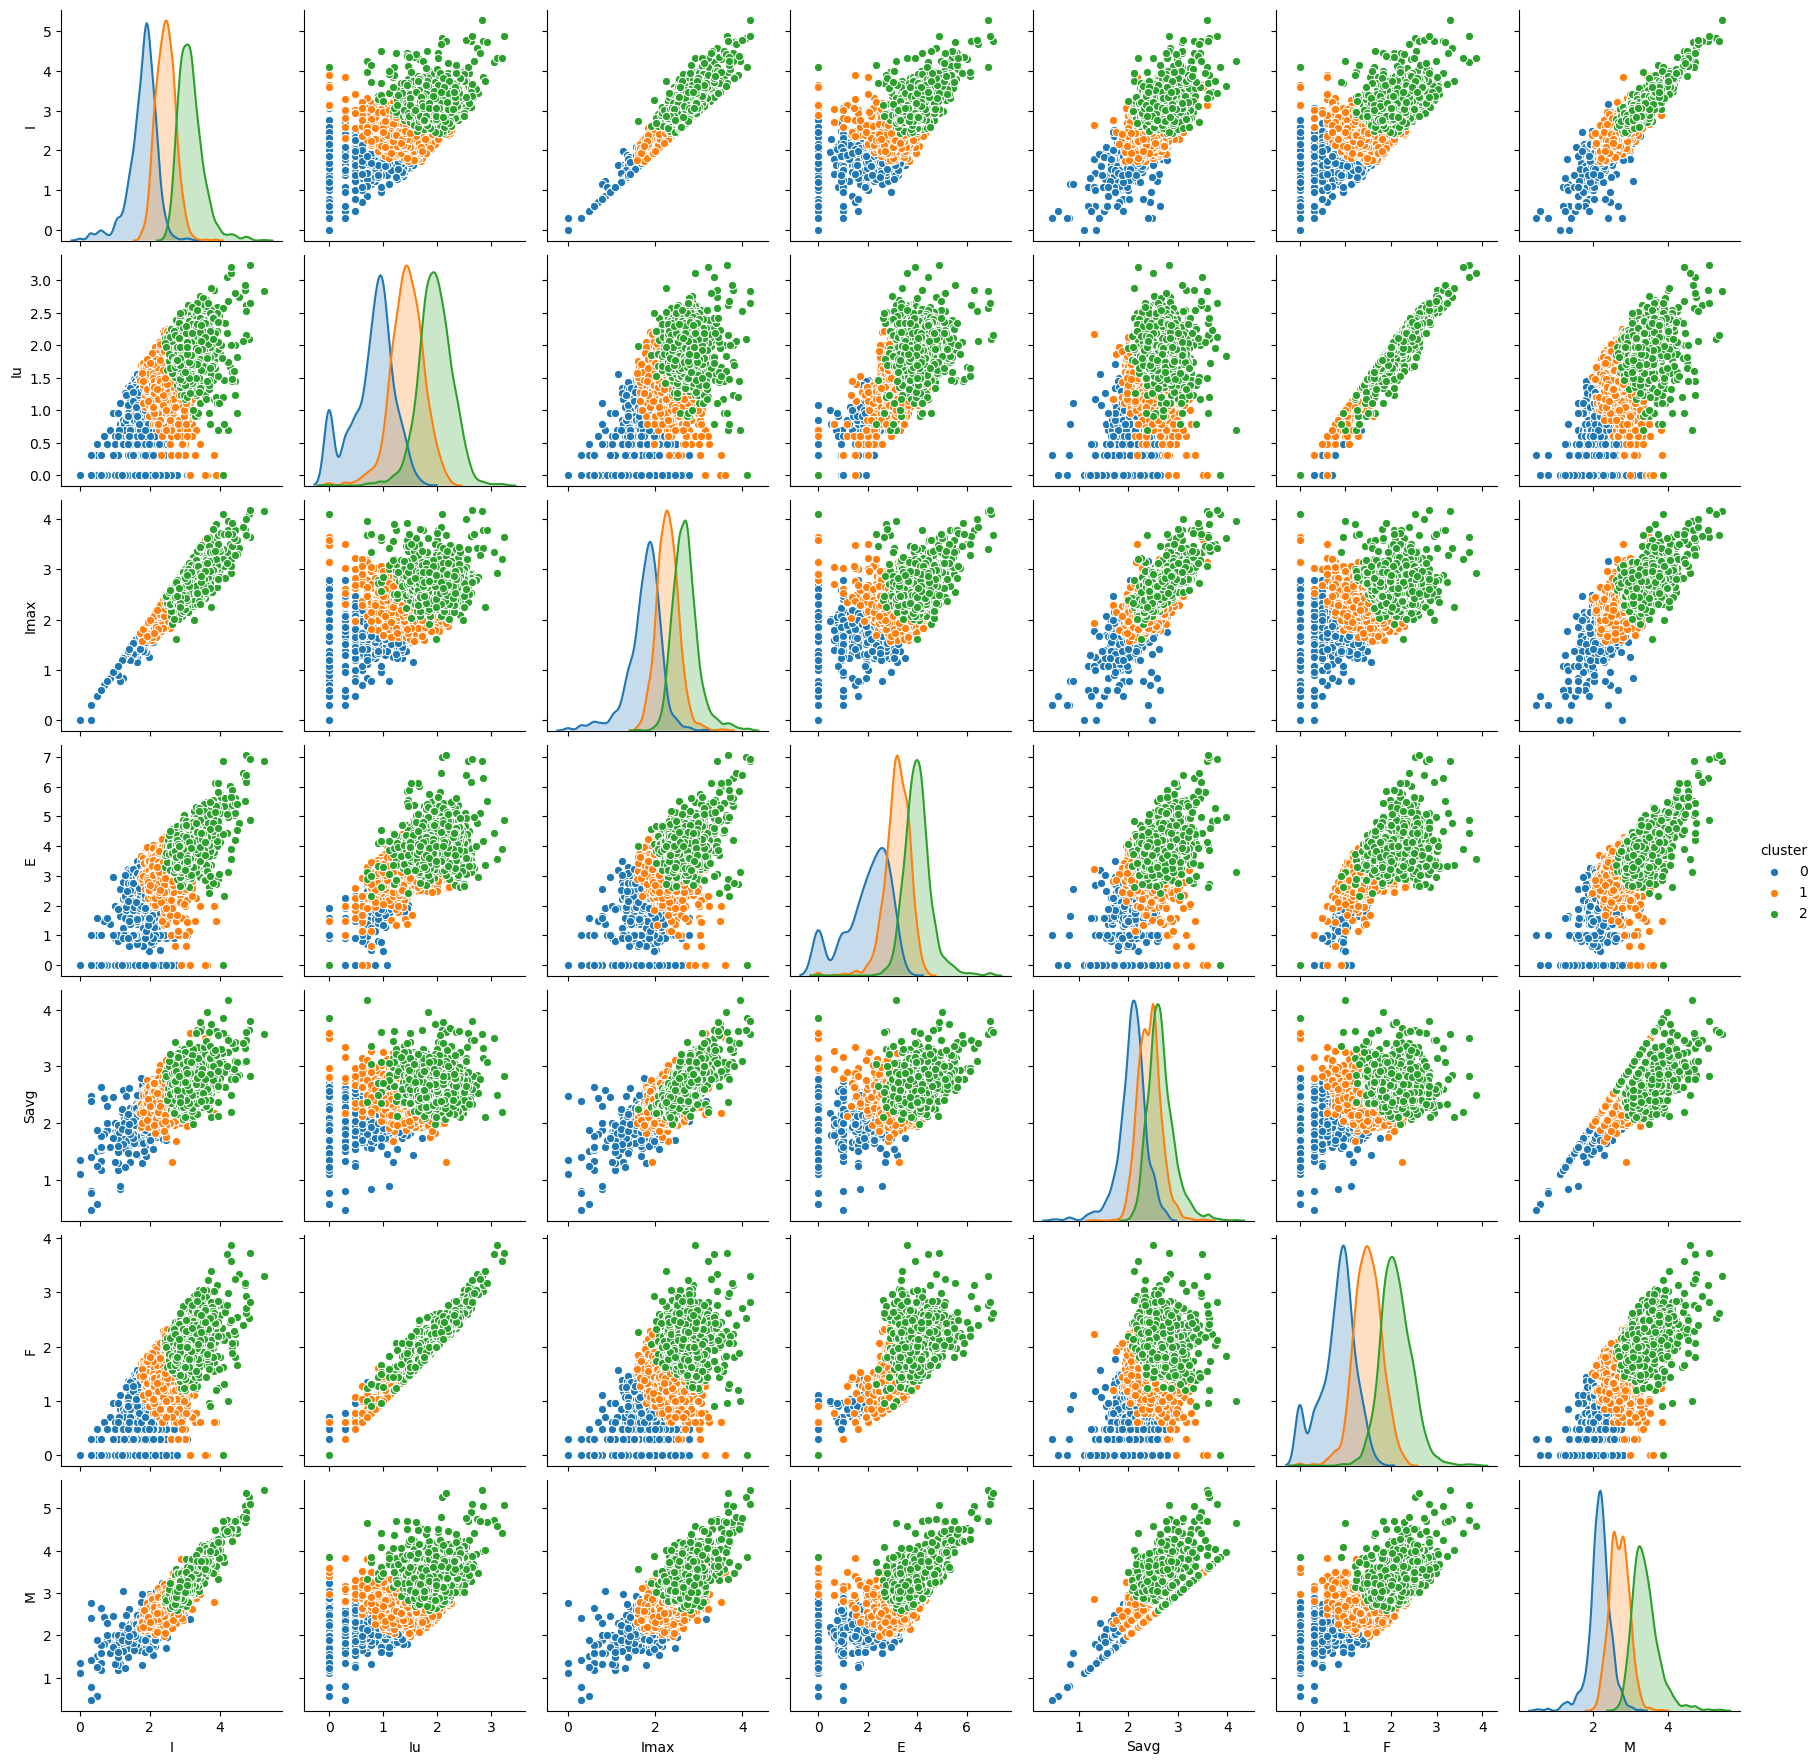

In [22]:
sns_plot = sns.pairplot(df_dona, hue='cluster', vars=df_dona.columns[1:-1])